## Day 2 Task 🐍 NYC High School Directory Exploration

In [21]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('/Users/root/Day_2/high-school-directory.csv')

In [ ]:
# Display the first few rows of the dataframe
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [ ]:
# Disply the random sample of 5 rows
df.sample(5)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
354,03M402,The Urban Assembly School for Green Careers,Manhattan,M470,212-787-1189,212-787-1455,9.0,12,NaN,NaN,...,6.0,169.0,1032128.0,1.012150e+09,Upper West Side ...,12421.0,20,4,19,12
193,05M157,The Urban Assembly School for Global Commerce,Manhattan,M501,212-831-5201,212-831-5206,9.0,11,9.0,12.0,...,9.0,206.0,1054156.0,1.017520e+09,Central Harlem North-Polo Grounds ...,13093.0,7,4,36,16
266,05M362,Columbia Secondary School,Manhattan,M125,212-666-1278,212-666-3805,6.0,12,NaN,NaN,...,7.0,20901.0,1059526.0,1.019640e+09,Morningside Heights ...,12424.0,37,4,23,17
183,32K556,Bushwick Leaders High School for Academic Exce...,Brooklyn,K865,718-919-4212,718-574-1103,9.0,12,NaN,NaN,...,34.0,393.0,3073761.0,3.032420e+09,Bushwick South ...,18181.0,42,2,30,53
99,14K449,"Brooklyn Latin School, The",Brooklyn,K049,718-366-0154,718-381-3012,9.0,12,NaN,NaN,...,34.0,505.0,3070825.0,3.030250e+09,East Williamsburg ...,17213.0,36,2,30,56


In [15]:
# display the columns names of dataframe 
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [ ]:
# Display the basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

In [ ]:
# Display the shape of the dataframe
df.shape

(435, 69)

In [ ]:
# Display the basic statistics of the dataframe
df.describe()

,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,postcode,total_students,number_programs,Community Board,Council District,Census Tract,BIN,BBL,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
count,432.000000,435.000000,31.000000,33.000000,435.000000,426.000000,435.000000,432.000000,432.000000,432.000000,4.310000e+02,4.310000e+02,434.000000,435.000000,435.000000,435.000000,435.000000
mean,8.442130,11.894253,8.516129,12.363636,10726.096552,703.842723,1.708046,6.787037,21.856481,3988.340278,2.581724e+06,2.510921e+09,14232.228111,38.372414,3.452874,28.832184,36.949425
std,1.164591,0.421583,1.121635,0.783349,537.927907,775.870436,1.564233,4.367781,14.321718,15582.415491,1.189750e+06,1.136455e+09,3529.272774,19.345374,1.212249,14.209488,21.107520
min,6.000000,9.000000,6.000000,12.000000,10001.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000811e+06,1.000160e+09,10090.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,12.000000,9.000000,12.000000,10301.500000,349.000000,1.000000,3.000000,10.000000,118.000000,2.000992e+06,2.023060e+09,11606.000000,22.000000,2.000000,17.000000,23.000000
50%,9.000000,12.000000,9.000000,12.000000,10472.000000,460.500000,1.000000,6.000000,18.000000,251.500000,2.116159e+06,2.053680e+09,13093.000000,39.000000,4.000000,32.000000,34.000000
75%,9.000000,12.000000,9.000000,12.000000,11217.000000,622.000000,2.000000,10.000000,34.000000,510.250000,3.330710e+06,3.068830e+09,16865.750000,53.500000,5.000000,40.000000,54.000000
max,9.000000,12.000000,9.000000,14.000000,11694.000000,5458.000000,10.000000,18.000000,51.000000,138501.000000,5.149609e+06,5.066130e+09,24669.000000,71.000000,5.000000,51.000000,77.000000


In [ ]:
# Display the count of missing values in each column
df.isna().sum()

dbn                       0
school_name               0
borough                   0
building_code             0
phone_number              0
                         ..
Zip Codes                 1
Community Districts       0
Borough Boundaries        0
City Council Districts    0
Police Precincts          0
Length: 69, dtype: int64

In [ ]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Display the count of unique values in 'City Council Districts'
df['City Council Districts'].value_counts

<bound method IndexOpsMixin.value_counts of 0      47
1      45
2      49
3      31
4      19
       ..
430    10
431    42
432    37
433    50
434    45
Name: City Council Districts, Length: 435, dtype: int64>

In [ ]:
# Clean column names
df.columns = [
    re.sub(r'[^a-zA-Z0-9_]', '', col.lower().strip().replace(' ', '_'))
    for col in df.columns
]

In [ ]:
# Display the cleaned column names
df.columns

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city',
       'state_code', 'postcode', 'website', 'total_students', 'campus_name',
       'school_type', 'overview_paragraph', 'program_highlights',
       'language_classes', 'advancedplacement_courses', 'online_ap_courses',
       'online_language_courses', 'extracurricular_activities',
       'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed',
       'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered',
       'partner_cultural', 'partner_nonprofit', 'partner_corporate',
       'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2',
       'start_time', 'end_time', 'se_services', 'ell_programs',
       'school_accessibility_description', 'number_programs', 'priority01',
       'priority02', 'priority03', 'priority04', 'prior

In [24]:
df['borough'].value_counts()

borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64

In [ ]:
# Filter the dataframe for Brooklyn borough
df_brooklyn = df[df['borough'] == 'Brooklyn']
df_brooklyn

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,17K524,International High School at Prospect Heights,Brooklyn,K440,718-230-6333,718-230-6322,9.0,12,NaN,NaN,...,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South ...,13509.0,17,2,48,44
423,17K408,Academy of Hospitality and Tourism,Brooklyn,K465,718-564-2580,718-564-2581,9.0,12,NaN,NaN,...,40.0,794.0,3336215.0,3.051030e+09,Erasmus ...,13510.0,60,2,11,43
427,15K592,Khalil Gibran International Academy,Brooklyn,K806,718-237-2502,718-488-1724,9.0,12,NaN,NaN,...,33.0,39.0,3331754.0,3.001740e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,17619.0,68,2,38,54
432,32K549,Bushwick School for Social Justice,Brooklyn,K480,718-381-7100,718-418-0192,9.0,12,NaN,NaN,...,37.0,435.0,3076908.0,3.033650e+09,Bushwick North ...,18181.0,42,2,37,53


In [33]:
df_brooklyn['dbn'].duplicated().sum()

np.int64(0)

In [ ]:
# How many total schools are in Brooklyn?
total_schools = df_brooklyn['dbn'].nunique()
print(f'Total number of schools in Brooklyn: {(total_schools)}')

Total number of schools in Brooklyn: 121


In [39]:
# Filter schools that offer Grade 9 entry
df_brooklyn_grade_9_schools = df_brooklyn[(df_brooklyn['grade_span_min'] <= 9) & (df_brooklyn['grade_span_max'] >= 9)]
print(f'Total number of schools in Brooklyn that offer Grade 9: {df_brooklyn_grade_9_schools.shape[0]}')

Total number of schools in Brooklyn that offer Grade 9: 121


In [41]:
# Count of schools per borough
borough_counts = df['borough'].value_counts()
borough_counts

borough
Brooklyn         121
Bronx            118
Manhattan        106
Queens            80
Staten Island     10
Name: count, dtype: int64

In [44]:
# Average number of students per borough
average_students_per_borough = df.groupby('borough')['total_students'].mean()
average_students_per_borough

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64

In [46]:
# Summary of grade_span_max grouped by borough
df.groupby('borough')['grade_span_max'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
Brooklyn,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
Manhattan,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
Queens,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
Staten Island,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


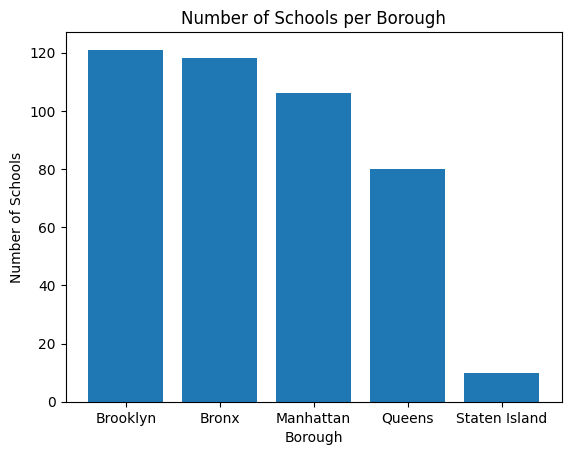

In [ ]:
# Bar chart: Number of schools per borough

# Count number of schools in each borough
borough_counts = df['borough'].value_counts()

# Create the bar chart
plt.bar(borough_counts.index, borough_counts.values)

# Add labels and title
plt.title('Number of Schools per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Schools')

# Show the chart
plt.show()

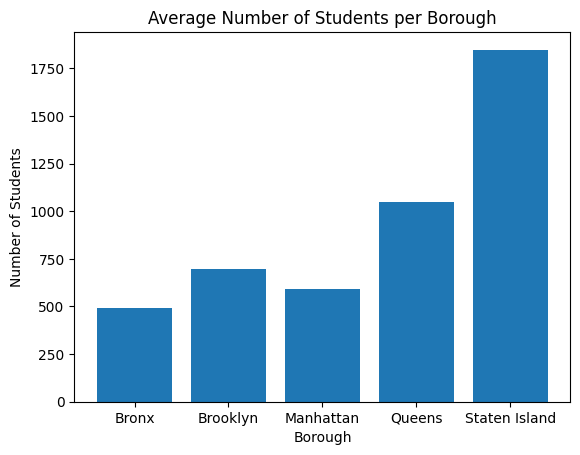

In [52]:
# Average number of students per borough
plt.bar(average_students_per_borough.index, average_students_per_borough.values)
plt.title('Average Number of Students per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Students')
plt.show()

## Key Insights:

1. Brooklyn has the highest number of schools among all boroughs, indicating a significant educational infrastructure.
2. A substantial number of schools in Brooklyn offer Grade 9 entry, which is crucial for high school education.
3. The average number of students per borough varies, with some boroughs having significantly larger student populations than others in this case Staten Island, which may impact resource allocation and educational policies.